# KNN Glass Data set 

### Problem Statement:
Prepare a model for glass classification using KNN

# ============================================================= 

# 1. Data Description -  

**RI :** refractive index

**Na:** Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

**Mg:** Magnesium

**AI:** Aluminum

**Si:** Silicon

**K:** Potassium

**Ca:** Calcium

**Ba:** Barium

**Fe:** Iron



**Type: Type of glass: (class attribute)**

**1 --** building_windows_float_processed

**2 --** building_windows_non_float_processed

**3 --** vehicle_windows_float_processed

**4 --** vehicle_windows_non_float_processed (none in this database)


**5 --** containers

**6 --** tableware

**7 --** headlamps 

# 2. Import Neccessery Libraries -  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

# 3. Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 4. Import Data Set -  

In [3]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 5. EDA -  

In [4]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [8]:
glass.duplicated().sum()

1

In [9]:
glass.drop_duplicates(inplace = True)

In [10]:
glass.duplicated().sum()

0

# 6. Data Visualization -  

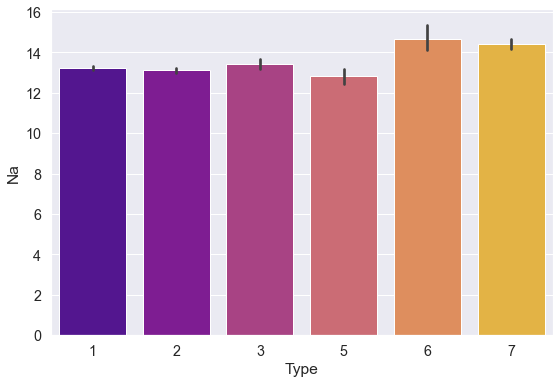

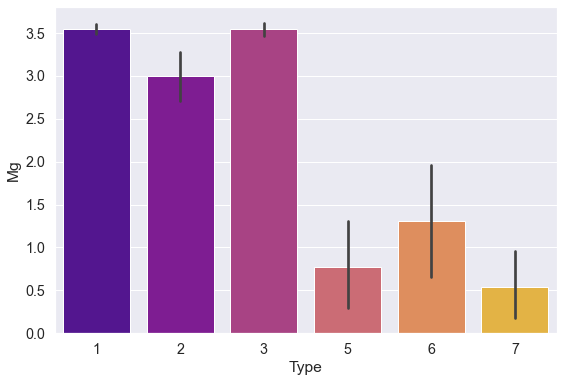

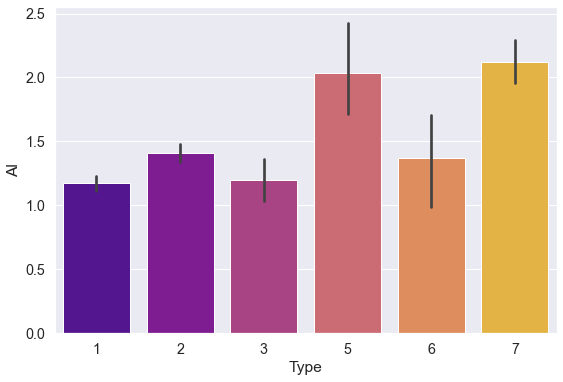

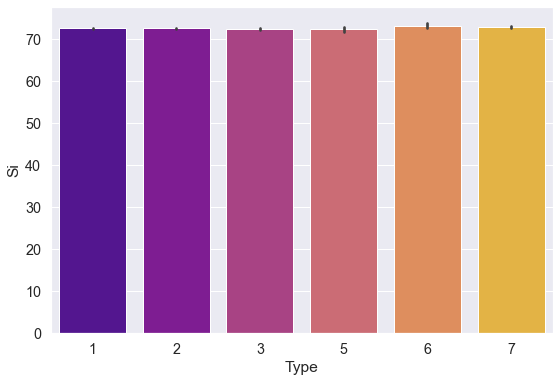

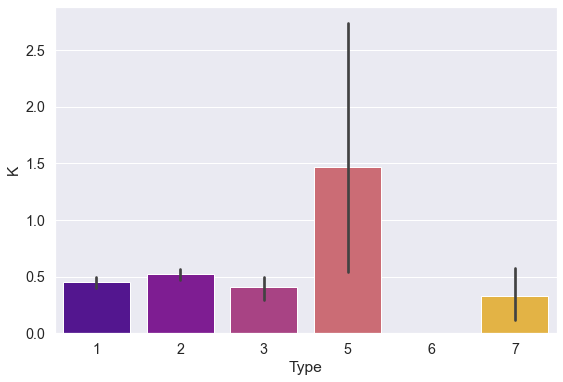

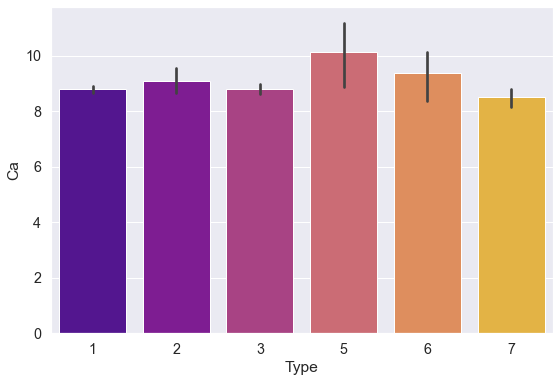

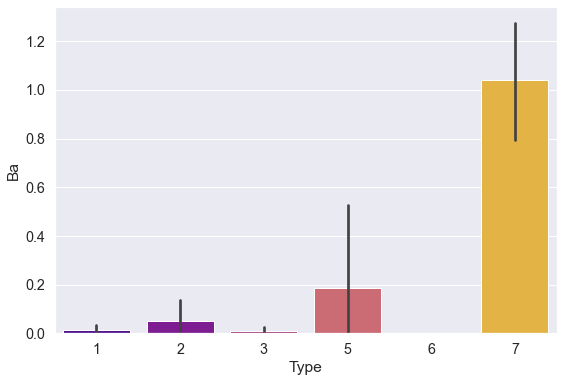

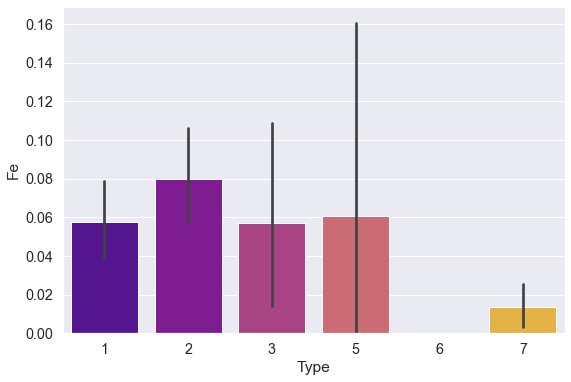

In [23]:
plt.rcParams['figure.figsize'] = [9, 6]
sns.set(style = "darkgrid", font_scale = 1.3)
a = ['Na','Mg','Al','Si','K','Ca','Ba','Fe']
for i in a :
    plt.figure()
    month_temp = sns.barplot(x = 'Type', y = i, data = glass,palette = 'plasma');

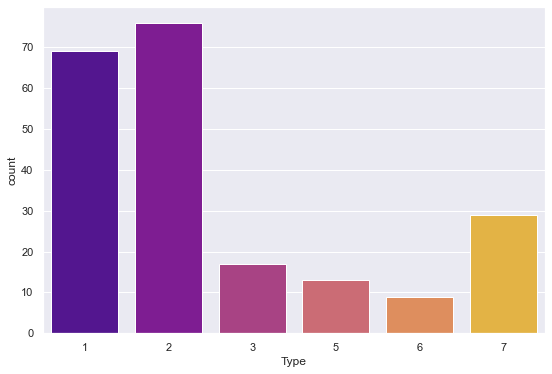

In [28]:
sns.set(rc={'figure.figsize':(9,6)})
sns.countplot(x = 'Type', data = glass, palette = 'plasma');

# 7. Model - 1 , with all features 

In [31]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
x = glass.drop('Type',axis=1)
y = glass[['Type']]

In [32]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [35]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=4)
grid.fit(x, y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [36]:
print(grid.best_score_)
print(grid.best_params_)

0.6481481481481481
{'n_neighbors': 6}


In [39]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=6)

In [40]:
pred_y= knn.predict(x)

In [41]:
accuracy_score(y,pred_y)

0.7464788732394366

In [42]:
confusion_matrix(y,pred_y)

array([[62,  6,  1,  0,  0,  0],
       [16, 56,  1,  1,  2,  0],
       [ 9,  2,  6,  0,  0,  0],
       [ 0,  5,  0,  8,  0,  0],
       [ 0,  2,  0,  0,  5,  2],
       [ 2,  4,  0,  0,  1, 22]], dtype=int64)

In [43]:
print(classification_report(y,pred_y))

              precision    recall  f1-score   support

           1       0.70      0.90      0.78        69
           2       0.75      0.74      0.74        76
           3       0.75      0.35      0.48        17
           5       0.89      0.62      0.73        13
           6       0.62      0.56      0.59         9
           7       0.92      0.76      0.83        29

    accuracy                           0.75       213
   macro avg       0.77      0.65      0.69       213
weighted avg       0.76      0.75      0.74       213



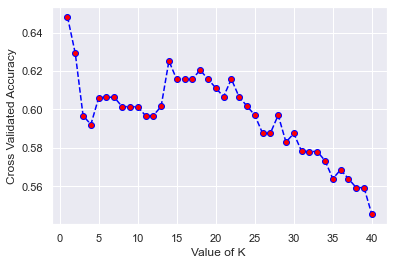

In [44]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('Value of K ')
plt.ylabel('Cross Validated Accuracy')
plt.show()

# 8. Model using train_test_split 

In [46]:
x=glass.drop('Type',axis=1)
y=glass[['Type']]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [48]:
print('x_train_shape :',x_train.shape , '\ny_train_shape :',y_train.shape)
print('x_test_shape :',x_test.shape , '\ny_test_shape :',y_test.shape)

x_train_shape : (170, 9) 
y_train_shape : (170, 1)
x_test_shape : (43, 9) 
y_test_shape : (43, 1)


## Model Building || Model Training
 

In [50]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

## Model Testing 

In [51]:
#prediction for training
pred_y= model.predict(x_train)

In [52]:
#accuracy Score
accuracy_score(y_train,pred_y)*100

75.29411764705883

In [53]:
#counfusion Matrix
confusion_matrix(y_train,pred_y)

array([[42,  5,  0,  0,  0,  0],
       [ 9, 53,  1,  2,  1,  0],
       [ 7,  2,  4,  0,  0,  0],
       [ 0,  4,  0,  6,  0,  2],
       [ 0,  1,  0,  0,  3,  2],
       [ 2,  3,  0,  0,  1, 20]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_y))

              precision    recall  f1-score   support

           1       0.70      0.89      0.79        47
           2       0.78      0.80      0.79        66
           3       0.80      0.31      0.44        13
           5       0.75      0.50      0.60        12
           6       0.60      0.50      0.55         6
           7       0.83      0.77      0.80        26

    accuracy                           0.75       170
   macro avg       0.74      0.63      0.66       170
weighted avg       0.76      0.75      0.74       170



## Visualizing the CV results
 

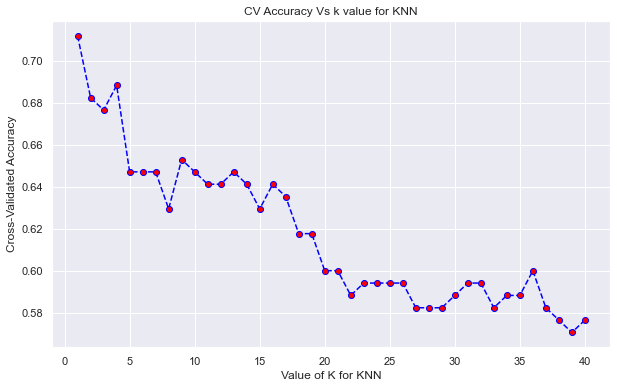

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 scores = cross_val_score(knn, x_train, y_train, cv=5)
 k_scores.append(scores.mean())
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()